In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 


In [2]:
## Creating syntheic data using make_blobs function we imported from the sklearn.datasets

n_samples = 10000
centers = [(-2, 2), (0,0), (2,2)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=0)

## The convention is to store the independent features in a matrix named X, and the prediction targets in a vector named y, as we are doing.

In [3]:
X


array([[-0.23594765,  2.40015721],
       [-1.02126202,  4.2408932 ],
       [-0.13244201,  1.02272212],
       ...,
       [ 0.98700332,  2.27166174],
       [ 1.89100272,  1.94274075],
       [ 0.94106874,  1.67347156]])

In [4]:
y

array([0, 0, 0, ..., 2, 2, 2])

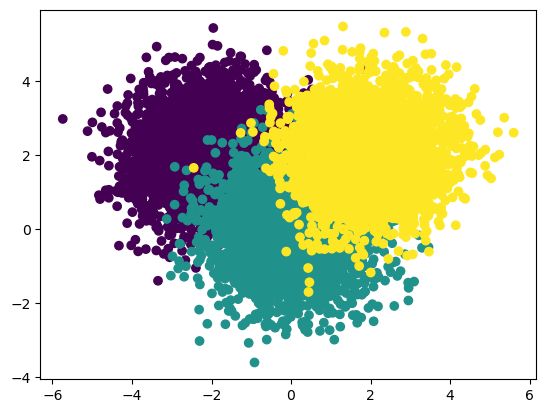

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

The most common strategy of a model selection process is to first split our data into a training dataset and a test/validation dataset. The training dataset is used to train the machine learning models we'd like to use, and the test dataset is used to validate the performance of those models.

In [6]:
## The train_test_split() function from the sklearn.model_selection package facilitates the process of splitting our dataset into the training and test datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=0)

 As we can see, this function returns a tuple of four objects, which we are assigning to the four preceding variables: X_train contains the data in the independent features for the training dataset, while X_test contains the data of the same features for the test dataset, and the equivalent goes for y_train and y_test

In [7]:
X_train.shape

(7500, 2)

In [8]:
X_test.shape

(2500, 2)

#### In the next code cell, we will initialize the machine learning models that we have imported without specifying any hyperparameters (more on this later):

In [9]:
models = [KNeighborsClassifier(), SVC(),GradientBoostingClassifier()]

In [10]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{type(model).__name__}: {accuracy_score(y_pred, y_test)}')

KNeighborsClassifier: 0.8792
SVC: 0.8952
GradientBoostingClassifier: 0.8876


From here, we see that the SVC model performed the best, which is somewhat 
expected as it is the most complex model out of the three used. In an actual model selection process, you might incorporate more tasks, such as cross-validation, to ensure that the model you select in the end is the best option.

In [11]:
# Import pandas library
import pandas as pd




In [12]:
# Create dataframe
sample_data = {'name': ['John', 'Alia', 'Ananya', 'Steve', 'Ben'],
               'gender': ['M', 'F', 'F', 'M', 'M'],
               'communication_skill_score': [40, 45, 23, 39, 39],
               'quantitative_skill_score': [38, 41, 42, 48, 32]}

data = pd.DataFrame(sample_data)



In [13]:
# find mean of communication_skill_score column 
data.head()

,name,gender,communication_skill_score,quantitative_skill_score
0,John,M,40,38
1,Alia,F,45,41
2,Ananya,F,23,42
3,Steve,M,39,48
4,Ben,M,39,32


In [14]:
data.describe()

,communication_skill_score,quantitative_skill_score
count,5.000000,5.000000
mean,37.200000,40.200000
std,8.318654,5.848077
min,23.000000,32.000000
25%,39.000000,38.000000
50%,39.000000,41.000000
75%,40.000000,42.000000
max,45.000000,48.000000


In [15]:

data


,name,gender,communication_skill_score,quantitative_skill_score
0,John,M,40,38
1,Alia,F,45,41
2,Ananya,F,23,42
3,Steve,M,39,48
4,Ben,M,39,32


### Skewness and kurtosis
Skewness measures the symmetry of a distribution. It shows how much the distribution deviates from a normal distribution. Its values can be zero, positive, and negative. A zero value represents a perfectly normal shape of a distribution. Positive skewness is shown by the tails pointing toward the right—that is, outliers are skewed to the right and data stacked up on the left. Negative skewness is shown by the tails pointing toward the left—that is, outliers are skewed to the left and data stacked up on the right. Positive skewness occurs when the mean is greater than the median and the mode. Negative skewness occurs when the mean is less than the median and mode. 

In [16]:
data['communication_skill_score'].skew()

-1.704679180800373

Kurtosis measures the tailedness (thickness of tail) compared to a normal distribution. High kurtosis is heavy-tailed, which means more outliers are present in the observations, and low values of kurtosis are light-tailed, which means fewer outliers are present in the observations

* A normal distribution having zero kurtosis is known as a mesokurtic distribution.
* A platykurtic distribution has a negative kurtosis value and is thin-tailed compared to a normal distribution.
* A leptokurtic distribution has a kurtosis value greater than 3 and is fat-tailed compared to a normal distribution.

In [18]:
data['communication_skill_score'].kurtosis()

3.6010641852384015

##  Understanding relationships between using covariance and correlation coefficients

Measuring the relationship between variables will be helpful for data analysts to understand the dynamics between variables—for example, an HR manager needs to understand the strength of the relationship between employee performance score and satisfaction score. Statistics offers two measures of covariance and correlation to understand the relationship between variables. Covariance measures the relationship between a pair of variables. It shows the degree of change in the variables—that is, how the change in one variable affects the other variable. Its value ranges from -infinity to + infinity. The problem with covariance is that it does not provide effective conclusions because it is not normalized. 

In [19]:
# Covariance between columns of dataframe
data.cov()

,communication_skill_score,quantitative_skill_score
communication_skill_score,69.20,-6.55
quantitative_skill_score,-6.55,34.20


Text(0.55, 50.2, 'Q3 + 1.5 * IQR = 50')

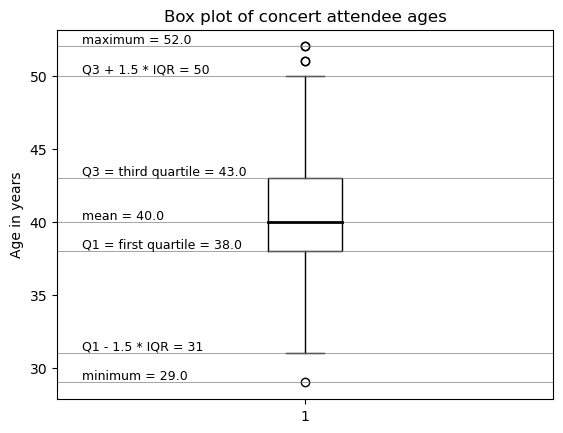

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math

ages = np.array(
    [40, 41, 39, 35, 42, 37, 45, 43, 42, 38, 39, 45, 37, 36,
     45, 41, 41, 31, 42, 40, 39, 38, 40, 39, 41, 46, 42, 44,
     46, 48, 45, 39, 46, 43, 35, 38, 43, 41, 36, 40, 34, 44,
     42, 44, 40, 49, 47, 51, 52, 45, 44, 47, 39, 38, 43, 39,
     45, 40, 36, 43, 38, 43, 32, 35, 36, 42, 40, 38, 37, 36,
     41, 41, 31, 39, 51, 38, 42, 36, 35, 36, 40, 40, 37, 43,
     39, 42, 44, 50, 39, 38, 37, 33, 52, 35, 44, 29, 42, 39,
     40, 42]
)

plt.title("Box plot of concert attendee ages")
plt.ylabel("Age in years")

# medianprops is a dict with the
# drawing options for the median line
plt.boxplot(ages, medianprops={"color": "black", "linewidth": 2})

quantiles = np.quantile(ages, [0.0, 0.25, 0.5, 0.75, 1.0])
labels = ["minimum", "Q1 = first quartile",
          "mean", "Q3 = third quartile", "maximum"]

for (q, label) in zip(quantiles, labels):
    plt.axhline(q, color="gray", linewidth=0.5)
    plt.text(0.55, q + 0.2, f"{label} = {q}", fontsize=9)

IQR = quantiles[3] - quantiles[1]

# Draw the lower whisker extreme. Below this are outliers.
q = math.ceil(quantiles[1] - 1.5 * IQR)
plt.axhline(q, color="gray", linewidth=0.5)
plt.text(0.55, q + 0.2, f"Q1 - 1.5 * IQR = {q}", fontsize=9)

# Draw the upper whisker extreme. Above this are outliers.
q = math.floor(quantiles[3] + 1.5 * IQR)
plt.axhline(q, color="gray", linewidth=0.5)
plt.text(0.55, q + 0.2, f"Q3 + 1.5 * IQR = {q}", fontsize=9)
